# Árvore de decisão

### Base de dados: Clima-Nominal

Ilustra o funcionamento do algoritmo de árvore de decisão com dados nominais.

-------------------------------------------------------------------------------

WEATHER.NOMINAL, Weka

http://storm.cis.fordham.edu/~gweiss/data-mining/datasets.html

DESCRIÇÃO DOS ATRIBUTOS:

1. Aparência {Ensolarado, Nublado, Chuvoso}
2. Temperatura {Quente, Moderado, Frio}
3. Umidade {Alta, Normal}
4. Vento {Fraco, Forte}
5. Jogar {Sim, Não}





### Inicialização da plataforma do Colab.

Essa seção instala e carrega os pacotes necessários para a execução do código.

In [35]:
%pip install pydotplus
%pip install dtreeviz

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [36]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn import tree


# WEATHER.NOMINAL, Weka
# http://storm.cis.fordham.edu/~gweiss/data-mining/datasets.html
# DESCRIÇÃO DOS ATRIBUTOS:
# Aparência {Ensolarado, Nublado, Chuvoso}
# Temperatura {Quente, Moderado, Frio}
# Umidade {Alta, Normal}
# Vento {Fraco, Forte}
# Jogar {Sim, Não}

### Transformação de dados

Inicialmente os atributos são convertidos para o formato de dicionário.
Em seguida os atributos são transformados em binário, para cada par (key, value) do dicionário.

<code>DictVectorizer(dtype=class ‘numpy.float64’, separator=’=’, sparse=True, sort=True)</code>

A classe é convertida para labels únicos sequenciais.

<code>
 le = preprocessing.LabelEncoder()
  
 le.fit(dados)
</code>


In [37]:
clima_nominal = pd.read_csv("./data/clima.csv", sep=";") 
clima_nominal.describe()

,Temperatura,Umidade
count,158.000000,158.000000
mean,71.797468,78.265823
std,7.088844,10.711276
min,59.000000,55.000000
25%,66.250000,70.000000
50%,71.000000,80.000000
75%,77.000000,88.000000
max,90.000000,96.000000


In [45]:
from sklearn.model_selection import train_test_split

X_dict = clima_nominal.iloc[:,0:4].T.to_dict().values()
vect = DictVectorizer(sparse=False)
X = vect.fit_transform(X_dict)

le = LabelEncoder()
y = le.fit_transform(clima_nominal.iloc[:,4])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
print("Data shape: ", clima_nominal.shape)
print("Features: ", clima_nominal.keys())

### Indução do Modelo


Os três passos para indução de um modelo são:

1.   Instanciar o modelo: ``` DecisionTreeClassifier()```
2.   Treinar o modelo: ```fit()```
3.   Testar o modelo: ```predict()```



In [49]:
dtree = DecisionTreeClassifier(random_state=0, criterion='entropy')
dtree.fit(X_train, y_train)
print("Training accuracy:", dtree.score(X_train, y_train))

y_pred = dtree.predict(X_test)
print("Pred accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_table = pd.DataFrame(data=cnf_matrix, index=["Jogar=Não", "Jogar=Sim"], columns=["Jogar(prev)=Não", "Prev. Jogar(prev)=Sim"])

Training accuracy: 1.0
Pred accuracy: 0.9375
              precision    recall  f1-score   support

           0       1.00      0.85      0.92        13
           1       0.90      1.00      0.95        19

    accuracy                           0.94        32
   macro avg       0.95      0.92      0.93        32
weighted avg       0.94      0.94      0.94        32



In [50]:
cnf_table

,Jogar(prev)=Não,Prev. Jogar(prev)=Sim
Jogar=Não,11,2
Jogar=Sim,0,19


### Exibição da árvore de decisão



Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x

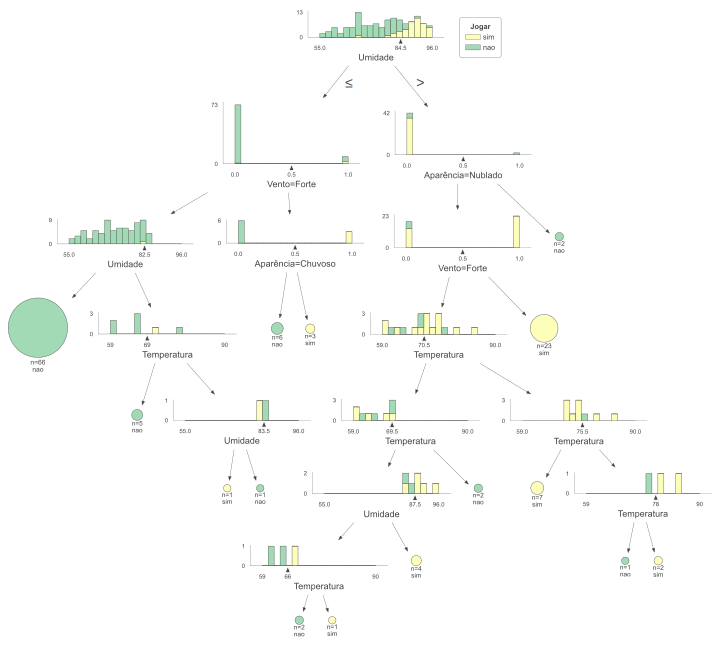

In [51]:
import dtreeviz

viz = dtreeviz.model(dtree,
              X_train,
              y_train,
              target_name='Jogar',
               feature_names=vect.feature_names_,
              class_names=["sim", "nao"])  

viz.view()

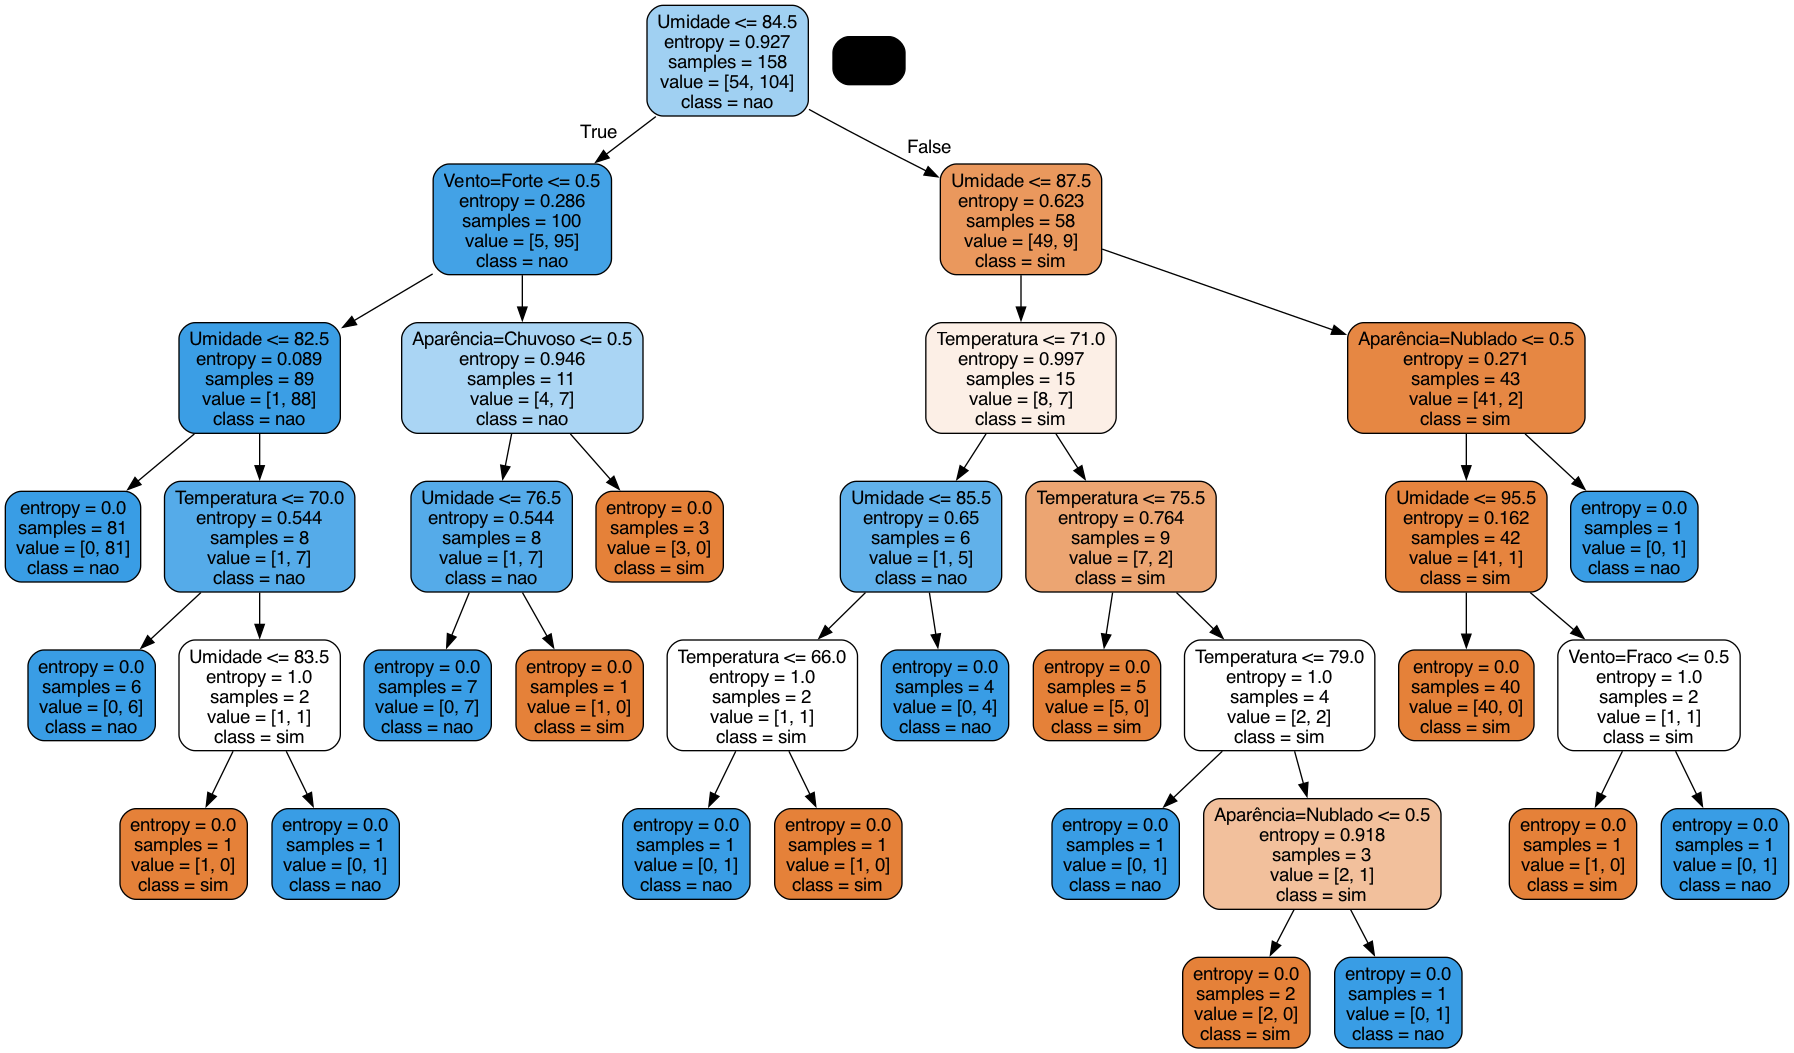

In [42]:
import pydotplus
from IPython.display import Image, display

# Create DOT data
dot_data = tree.export_graphviz(dtree, out_file=None, 
                                feature_names=vect.feature_names_,  
                                rounded =True,
                                filled=True,
                                class_names=["sim", "nao"])

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
display(Image(data=graph.create_png()))